power transformation

In [190]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [191]:
df= pd.read_csv("C:\\Users\\choud\\Desktop\\jupter_files\\feature_transformation.csv",usecols=['Survived','Age','Fare'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [192]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [193]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [194]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x.shape

(891, 2)

In [197]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score  # for classification problen

from sklearn.metrics import r2_score    # for regression problem
lr=LinearRegression()

In [198]:

lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
# accuracy_score(y_test,y_pred)
# r2_score(y_test,y_pred)

In [199]:
from sklearn.model_selection import cross_val_score

In [1]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

NameError: name 'np' is not defined

C:\Users\choud\AppData\Local\Temp\ipykernel_17228\333831335.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


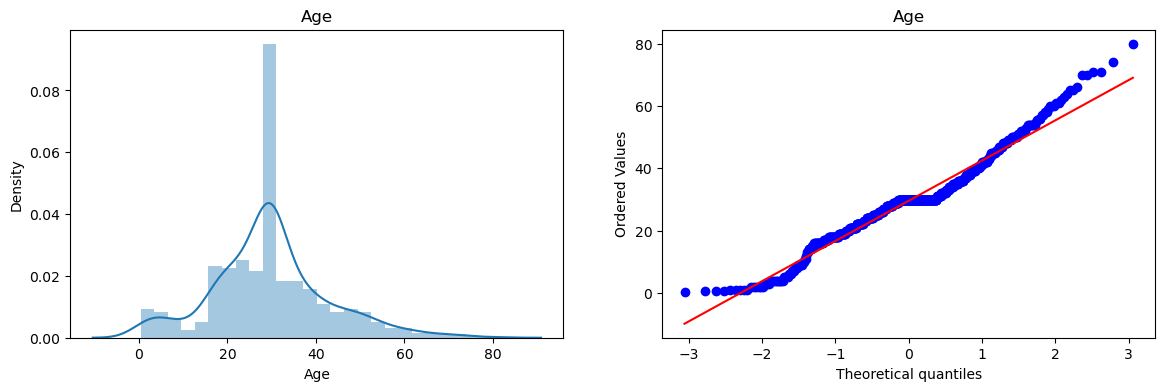

C:\Users\choud\AppData\Local\Temp\ipykernel_17228\333831335.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


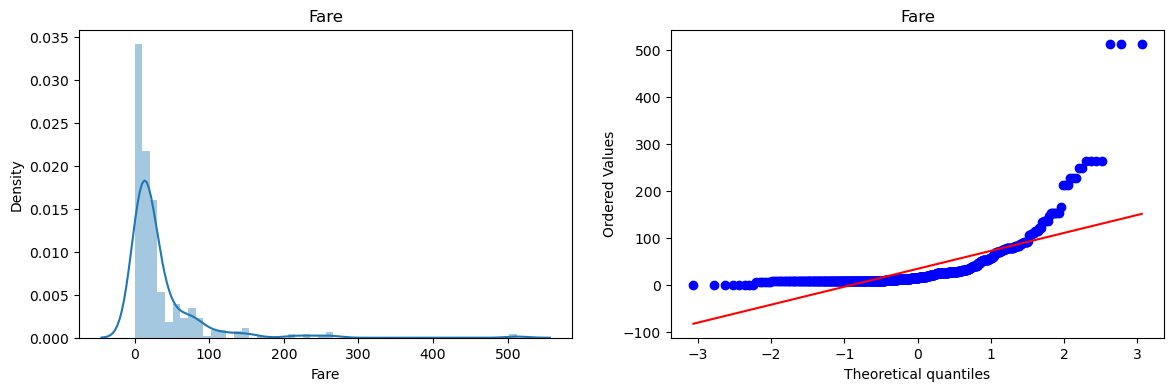

In [201]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()
    

Applying Box-Cox Transform

In [202]:
from sklearn.preprocessing import PowerTransformer

In [203]:
pt=PowerTransformer(method='box-cox')

x_train_trans=pt.fit_transform(x_train+0.000001)
x_test_trans=pt.transform(x_test+0.000001)

In [204]:
pd.DataFrame({'col':x_train.columns,'box-cox_lambda':pt.lambdas_})

,col,box-cox_lambda
0,Age,0.815254
1,Fare,0.217819


In [205]:
lr=LinearRegression()

In [206]:
lr.fit(x_train_trans,y_train)

y_pred2 = lr.predict(x_test_trans)
r2_score(y_test,y_pred2)

0.09618551982801171

In [207]:
pt=PowerTransformer()
x_trans=pt.fit_transform(x+0.0000001) 
lr=LinearRegression()

np.mean(cross_val_score(lr,x_trans,y,scoring='r2'))

0.1001097374719476

C:\Users\choud\AppData\Local\Temp\ipykernel_17228\1264917640.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\choud\AppData\Local\Temp\ipykernel_17228\1264917640.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

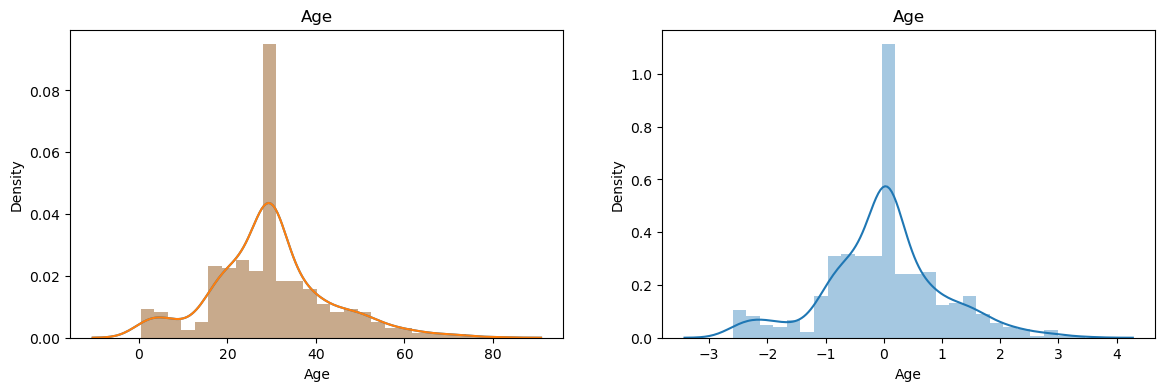

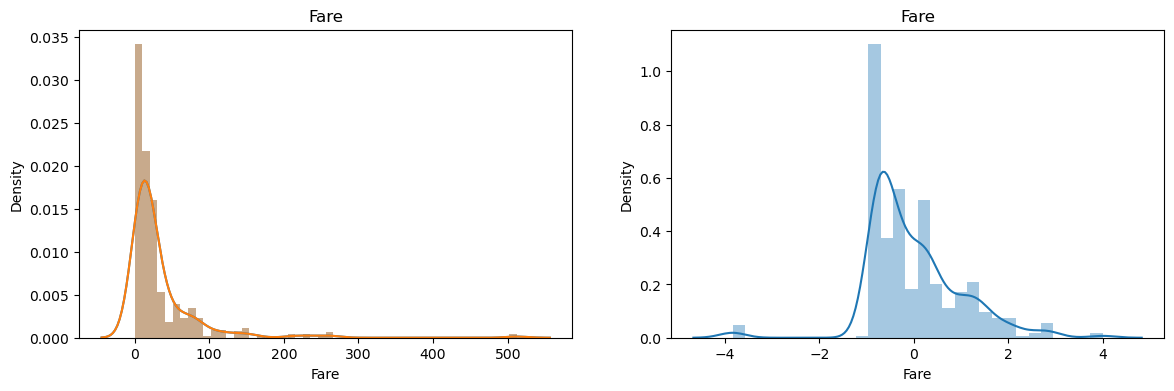

In [208]:
x_train_transfor=pd.DataFrame(x_train_trans,columns=x_train.columns)
for col in x_train_transfor.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transfor[col])
    plt.title(col)

    plt.show

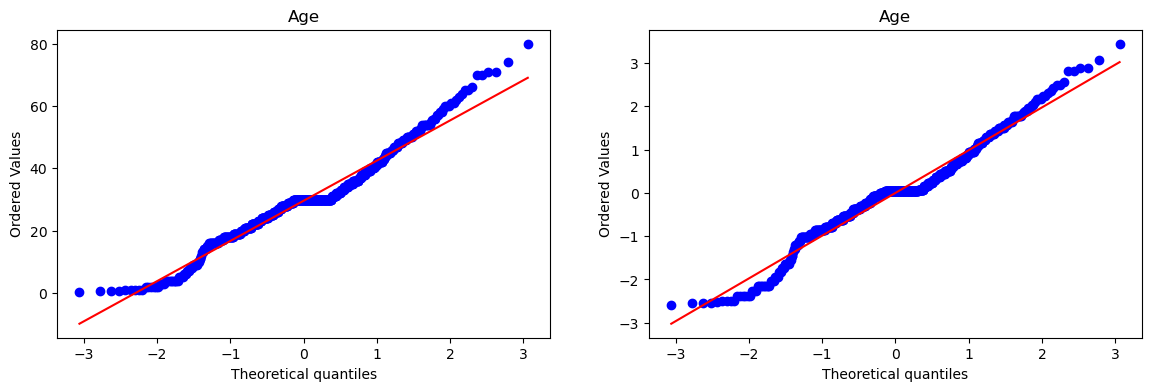

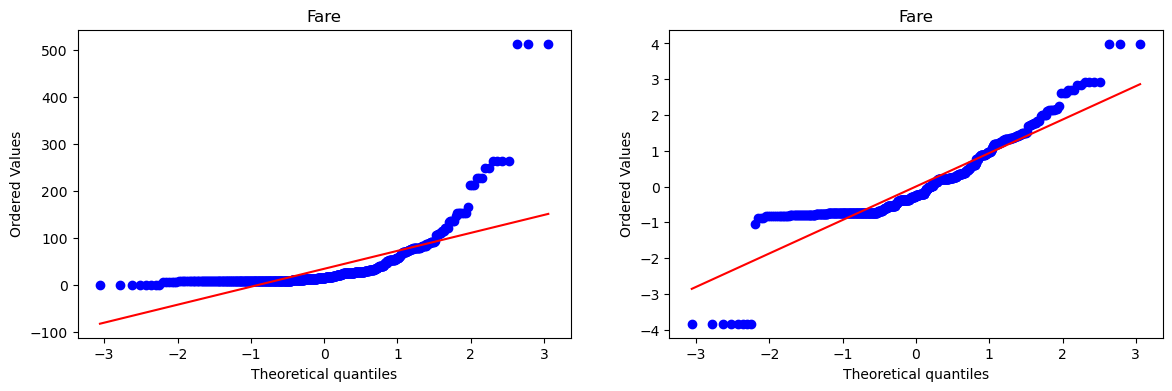

In [209]:
x_train_transfor=pd.DataFrame(x_train_trans,columns=x_train.columns)
for col in x_train_transfor.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    

    plt.subplot(122)
    stats.probplot(x_train_transfor[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show

Appling yeo-jonson transformer

In [210]:
# pty= PowerTransformer(method='yeo-jonson')
pty= PowerTransformer()

In [211]:
x_train_trans2=pty.fit_transform(x_train)
x_test_trans2=pty.transform(x_test)

lr=LinearRegression()

lr.fit(x_train_trans2,y_train)

y_pred2= lr.predict(x_test)

r2_score(y_test,y_pred2) #   for regression problem
# accuracy_score(y_test,y_pred2)   # for classification problem



B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-203.55606486080967

In [212]:
pd.DataFrame({'col':x_train.columns,'yeo-jonson_lambdas':pty.lambdas_})

,col,yeo-jonson_lambdas
0,Age,0.811727
1,Fare,-0.129201


In [213]:
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegression

pty=PowerTransformer()

x_trans2= pty.fit_transform(x)

# lr=LinearRegression()
lr=LogisticRegression()
# LogisticRegression()
# np.mean(cross_val_score(lr,x_transfor2,y,scoring='r2'))
np.mean(cross_val_score(lr,x_trans2,y,scoring='accuracy',cv=10))


0.6723720349563046

C:\Users\choud\AppData\Local\Temp\ipykernel_17228\3344423425.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
B:\learning programming\Python\App\ANAconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\choud\AppData\Local\Temp\ipykernel_17228\3344423425.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

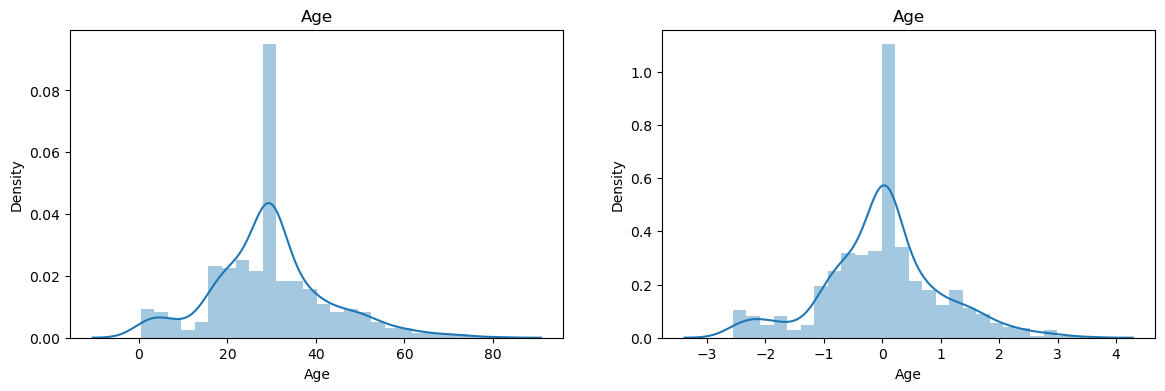

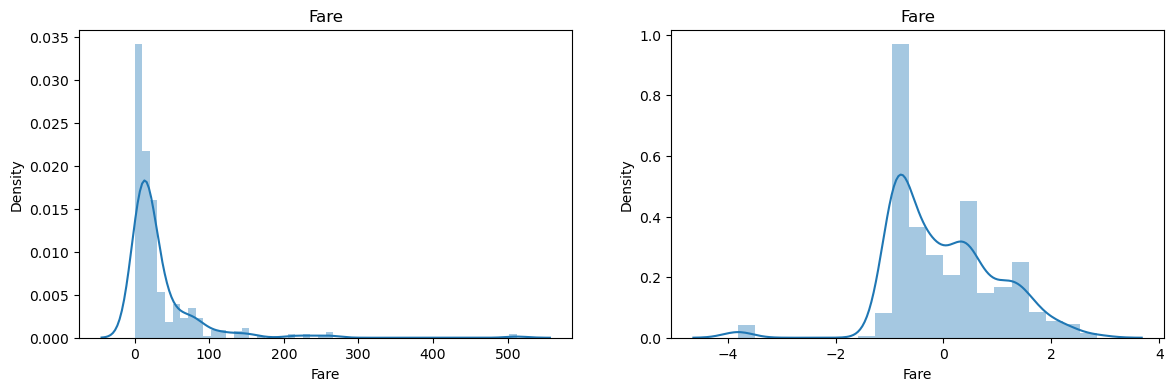

In [214]:
x_train_transfor2=pd.DataFrame(x_train_trans2, columns = x_train.columns)

for col in x_train_transfor.columns:

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transfor2[col])
    plt.title(col)

    plt.show

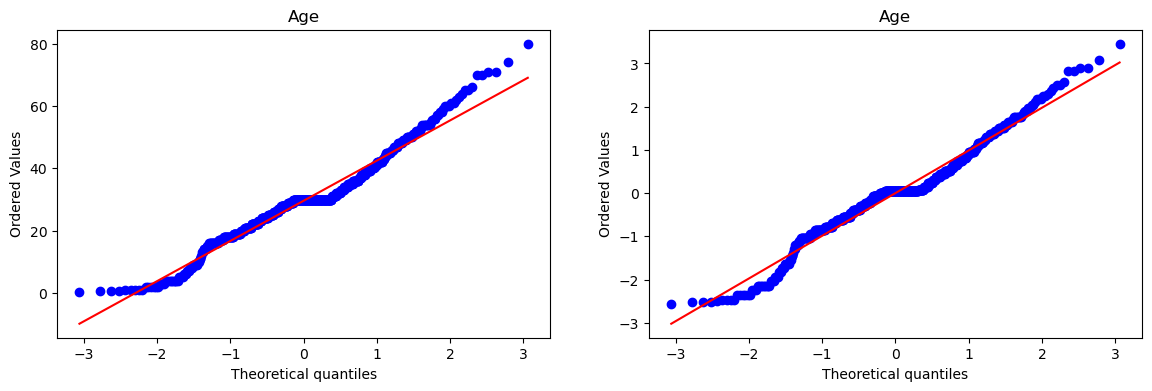

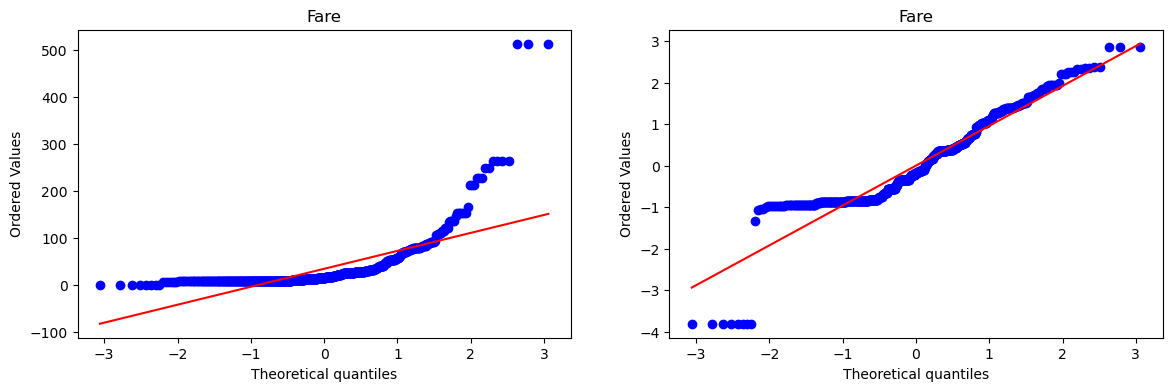

In [215]:

for col in x_train_transfor.columns:

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train_transfor2[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show

In [216]:
pd.DataFrame({'col':x_train.columns,'yeo-johnson_lambdas':pty.lambdas_})

,col,yeo-johnson_lambdas
0,Age,0.819744
1,Fare,-0.097787
